In [1]:
# https://medium.com/nuances-of-programming/%D0%BA%D0%B0%D0%BA-%D0%B8%D0%BC%D0%BF%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C-%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D1%8B-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-kaggle-%D0%B2-google-colab-51de3fd5a9a8#:~:text=%D0%97%D0%B0%D0%BF%D1%83%D1%81%D1%82%D0%B8%D1%82%D0%B5%20%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%20Google%20Colab%20%D0%B8,%D0%BD%D0%B5%D0%BE%D0%B1%D1%85%D0%BE%D0%B4%D0%B8%D0%BC%D1%8B%D1%85%20%D0%B4%D0%BB%D1%8F%20%D0%B7%D0%B0%D0%B3%D1%80%D1%83%D0%B7%D0%BA%D0%B8%20%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.
# Как импортировать наборы данных Kaggle в Google Colab?
# Сделать ШАГ 2 
# Также есть Лайфхак 2: Загрузка учетных данных Kaggle из Google Drive , чтобы каждый раз загружать kaggle.json
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


In [2]:
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download ml-intensive-of-yandex-academy-2023 #Но аккаунт должен быть зарегистрирован на соревновании

 94% 248M/263M [00:03<00:00, 94.5MB/s]
100% 263M/263M [00:03<00:00, 88.1MB/s]


In [3]:
# https://ru.stackoverflow.com/questions/1061024/%D0%94%D0%BE%D1%81%D1%82%D1%83%D0%BF-%D0%BA-%D0%BF%D0%B0%D0%BF%D0%BA%D0%B0%D0%BC-zip-%D0%B0%D1%80%D1%85%D0%B8%D0%B2%D0%B0-%D0%B2-google-colab
# Доступ к папкам ZIP-архива в Google Colab
import zipfile
import os
import matplotlib.pyplot as plt
%matplotlib inline

data_r = zipfile.ZipFile('ml-intensive-of-yandex-academy-2023.zip', 'r')
data_r.printdir()
data_r.extractall()

File Name                                             Modified             Size
data_test                                      2023-04-04 08:27:46    307200197
data_train                                     2023-04-04 08:28:10    614450277
meta                                           2023-04-04 08:29:00           73


In [4]:
# http://cs.mipt.ru/advanced_python/lessons/lab13.html
# Теперь в отдельной программе выполним десериализацию. Это уже надо всем делать.
import pickle

# Data_train
with open('data_train', 'rb') as f:
    data_train = pickle.load(f)
print(data_train)
# Data_test
with open('data_test', 'rb') as f:
    data_test = pickle.load(f)
print(data_test)

{'section': 'train', 'labels': array([1, 3, 2, ..., 7, 5, 8], dtype=uint8), 'images': array([[[[ 21.,  27.,  49.],
         [ 18.,  20.,  44.],
         [ 13.,  13.,  41.],
         ...,
         [  0.,   4.,   6.],
         [  0.,   4.,   4.],
         [  0.,   4.,   3.]],

        [[ 28.,  36.,  56.],
         [ 26.,  32.,  56.],
         [ 21.,  25.,  52.],
         ...,
         [  1.,   5.,   8.],
         [  0.,   4.,   4.],
         [  0.,   3.,   2.]],

        [[ 55.,  64.,  80.],
         [ 54.,  61.,  81.],
         [ 48.,  54.,  77.],
         ...,
         [  1.,   5.,   8.],
         [  0.,   4.,   5.],
         [  1.,   5.,   4.]],

        ...,

        [[ 55.,  47.,  57.],
         [ 36.,  31.,  40.],
         [ 19.,  16.,  24.],
         ...,
         [  7.,   8.,   8.],
         [  7.,   9.,   8.],
         [  7.,   8.,   8.]],

        [[ 18.,   8.,  22.],
         [ 14.,   7.,  20.],
         [  8.,   4.,  14.],
         ...,
         [  8.,   8.,   7.],
         [

ОСНОВНОЙ КОД


Пример:

ДО

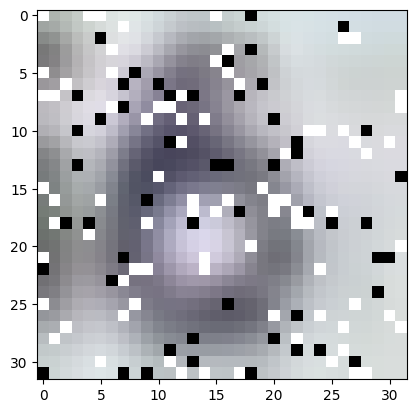

In [5]:
plt.imshow(data_train['images'][545].astype("uint8"))


После

//////

In [6]:
import numpy as np


def black_white_point(image):
    # получаем координаты черных пикселей
  black_pixels = np.where(np.all(image == [0, 0, 0], axis=-1))
  # print('Removing black pixels...')

  # заменяем черные пиксели на среднее значение пикселей в окрестности 3x3
  for i, j in zip(black_pixels[0], black_pixels[1]):
      # получаем окрестность 3x3 пикселя
      neighborhood = image[max(0, i-1):min(i+2, image.shape[0]), max(0, j-1):min(j+2, image.shape[1])].reshape((-1, 3))
      # отсеиваем соль и перец чтобы не мешались
      neighborhood1 = neighborhood[np.nonzero(np.sum(neighborhood, axis=1))]
      neighborhood1 = neighborhood1[np.nonzero(np.sum(neighborhood1, axis=1) != 255*3)]
      if not neighborhood1.any():  # на случай если пиксель полностью окружён шумом
          neighborhood1 = neighborhood
      # считаем среднее значение пикселей
      mean_pixel = np.mean(neighborhood1, axis=0)
      # заменяем черный пиксель на среднее значение
      image[i, j] = mean_pixel


  # получаем координаты белых пикселей
  white_pixels = np.where(np.all(image == [255, 255, 255], axis=-1))
  # print('Removing white pixels...')

  # заменяем черные пиксели на среднее значение пикселей в окрестности 3x3
  for i, j in zip(white_pixels[0], white_pixels[1]):
      # получаем окрестность 3x3 пикселя
      neighborhood = image[max(0, i-1):min(i+2, image.shape[0]), max(0, j-1):min(j+2, image.shape[1])].reshape((-1, 3))
      # отсеиваем соль и перец чтобы не мешались
      neighborhood1 = neighborhood[np.nonzero(np.sum(neighborhood, axis=1))]
      neighborhood1 = neighborhood1[np.nonzero(np.sum(neighborhood1, axis=1) != 255*3)]
      if not neighborhood1.any():  # на случай если пиксель полностью окружён шумом
          neighborhood1 = neighborhood
      # считаем среднее значение пикселей
      mean_pixel = np.mean(neighborhood1, axis=0)
      # заменяем белый пиксель на среднее значение
      image[i, j] = mean_pixel

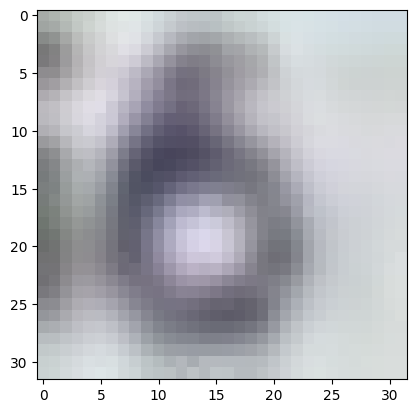

In [7]:
img = data_train['images'][545]
black_white_point(img)
plt.imshow(img.astype("uint8"))

In [11]:
for image in data_train['images']:
  black_white_point(image)

for image in data_test['images']:
  black_white_point(image)


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = np.random.randint(len(data_train['images']))
    image = data_train['images'][idx]
    label = data_train['labels'][idx]

    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.astype("uint8"))
    plt.title(label)
    plt.axis("off")